In [86]:
import pandas as pd
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [87]:
# urlav = "https://raw.githubusercontent.com/olagit/Structure-vs-properties-of-compounds/main/data/Avalon.csv"
# avalon = pd.read_csv(urlav)

# urlmor = "https://raw.githubusercontent.com/olagit/Structure-vs-properties-of-compounds/main/data/Morgan.csv"
# morgan = pd.read_csv(urlmor)

urlmac = "https://raw.githubusercontent.com/olagit/Structure-vs-properties-of-compounds/main/data/maccs.csv"
maccs = pd.read_csv(urlmac)

In [88]:
maccs.head()

,index,logP,smiles,fp0,fp1,fp2,fp3,fp4,fp5,fp6,...,fp157,fp158,fp159,fp160,fp161,fp162,fp163,fp164,fp165,fp166
0,0,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,0,0,0,0,0,0,0,...,1,0,1,0,1,1,1,1,1,0
1,1,-3.30,Cc1occc1C(=O)Nc2ccccc2,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
2,2,-2.06,CC(C)=CCCC(C)=CC(=O),0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,3,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,4,-1.33,c1ccsc1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [89]:
maccs.shape

(1128, 170)

In [90]:
maccs_fps = maccs.iloc[:,3:515].values

maccs_logps = maccs.iloc[:,1].values

maccs_logps_fps = maccs.drop(['index', 'smiles'], axis=1)

In [91]:
maccs_fps.shape

(1128, 167)

In [92]:
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig

In [93]:
import os
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

In [94]:
import numpy as np

maccs['Donor'] = np.zeros(maccs.shape[0], dtype=int)
maccs['Acceptor'] = np.zeros(maccs.shape[0], dtype=int)
maccs['Aromatic'] = np.zeros(maccs.shape[0], dtype=int)
maccs['Hydrophobe'] = np.zeros(maccs.shape[0], dtype=int)
maccs['LumpedHydrophobe'] = np.zeros(maccs.shape[0], dtype=int)

In [95]:
for i in range(maccs.shape[0]):
    m = Chem.MolFromSmiles(maccs['smiles'][i])
    feats = factory.GetFeaturesForMol(m)
    if feats:
        for j in range(len(feats)):
            if feats[j].GetFamily() == 'Donor':
                maccs.loc[i, 'Donor'] += 1
            elif feats[j].GetFamily() == 'Acceptor':
                maccs.loc[i, 'Acceptor'] += 1
            elif feats[j].GetFamily() == 'Aromatic':
                maccs.loc[i, 'Aromatic'] += 1
            elif feats[j].GetFamily() == 'Hydrophobe':
                maccs.loc[i, 'Hydrophobe'] += 1
            elif feats[j].GetFamily() == 'LumpedHydrophobe':
                maccs.loc[i, 'LumpedHydrophobe'] += 1
                
maccs.head()

,index,logP,smiles,fp0,fp1,fp2,fp3,fp4,fp5,fp6,...,fp162,fp163,fp164,fp165,fp166,Donor,Acceptor,Aromatic,Hydrophobe,LumpedHydrophobe
0,0,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,0,0,0,0,0,0,0,...,1,1,1,1,0,7,11,1,1,1
1,1,-3.30,Cc1occc1C(=O)Nc2ccccc2,0,0,0,0,0,0,0,...,1,1,1,1,0,1,1,2,1,1
2,2,-2.06,CC(C)=CCCC(C)=CC(=O),0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,6,0
3,3,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,5,8,5
4,4,-1.33,c1ccsc1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1


In [96]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard

res = 1 - pdist(maccs_fps, 'jaccard')
squareform(res)
maccs_distance = pd.DataFrame(squareform(res), index=maccs.index, columns= maccs.index)

maccs_distance

,0,1,2,3,4,5,6,7,8,9,...,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127
0,0.000000,0.215686,0.040816,0.102564,0.075000,0.125000,0.116279,0.307692,0.200000,0.433962,...,0.186047,0.000000,0.116279,0.157895,0.111111,0.000000,0.132353,0.120690,0.023810,0.203704
1,0.215686,0.000000,0.078947,0.137931,0.178571,0.257143,0.187500,0.208333,0.190476,0.320000,...,0.108108,0.032258,0.187500,0.214286,0.282051,0.000000,0.240741,0.057692,0.031250,0.195652
2,0.040816,0.078947,0.000000,0.000000,0.000000,0.000000,0.000000,0.175000,0.083333,0.195652,...,0.428571,0.235294,0.000000,0.000000,0.054054,0.000000,0.120000,0.257143,0.375000,0.128205
3,0.102564,0.137931,0.000000,0.000000,0.166667,0.315789,0.357143,0.181818,0.192308,0.175000,...,0.000000,0.000000,0.357143,0.250000,0.107143,0.000000,0.000000,0.000000,0.000000,0.090909
4,0.075000,0.178571,0.000000,0.166667,0.000000,0.388889,0.117647,0.083333,0.107143,0.119048,...,0.000000,0.000000,0.117647,0.153846,0.068966,0.000000,0.021277,0.028571,0.000000,0.058824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187500,0.026316,0.148148,0.000000,...,0.000000,0.083333,0.187500,0.000000,0.000000,0.000000,0.021277,0.058824,0.000000,0.161290
1124,0.132353,0.240741,0.120000,0.000000,0.021277,0.092593,0.000000,0.057971,0.031746,0.157143,...,0.217391,0.093023,0.000000,0.042553,0.274510,0.021277,0.000000,0.272727,0.090909,0.206897
1125,0.120690,0.057692,0.257143,0.000000,0.028571,0.044444,0.000000,0.196078,0.060000,0.169492,...,0.294118,0.129032,0.000000,0.000000,0.152174,0.058824,0.272727,0.000000,0.161290,0.318182
1126,0.023810,0.031250,0.375000,0.000000,0.000000,0.000000,0.000000,0.054054,0.000000,0.068182,...,0.375000,0.444444,0.000000,0.000000,0.033333,0.000000,0.090909,0.161290,0.000000,0.058824


In [97]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(affinity='precomputed', n_clusters=30, linkage='complete').fit(maccs_distance)
print(model.labels_)

[ 0  2  0 ... 17 11 10]


In [98]:
maccs['Agglomerative'] = model.labels_
maccs

,index,logP,smiles,fp0,fp1,fp2,fp3,fp4,fp5,fp6,...,fp163,fp164,fp165,fp166,Donor,Acceptor,Aromatic,Hydrophobe,LumpedHydrophobe,Agglomerative
0,0,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,0,0,0,0,0,0,0,...,1,1,1,0,7,11,1,1,1,0
1,1,-3.300,Cc1occc1C(=O)Nc2ccccc2,0,0,0,0,0,0,0,...,1,1,1,0,1,1,2,1,1,2
2,2,-2.060,CC(C)=CCCC(C)=CC(=O),0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,6,0,0
3,3,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,0,0,0,0,0,0,0,...,1,0,1,0,0,0,5,8,5,0
4,4,-1.330,c1ccsc1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1123,-1.710,FC(F)(F)C(Cl)Br,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6
1124,1124,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C,0,0,0,0,0,0,0,...,0,1,0,0,2,3,0,0,0,3
1125,1125,-3.091,CCSCCSP(=S)(OC)OC,0,0,0,0,0,0,0,...,0,1,0,0,0,2,0,3,0,17
1126,1126,-3.180,CCC(C)C,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,11


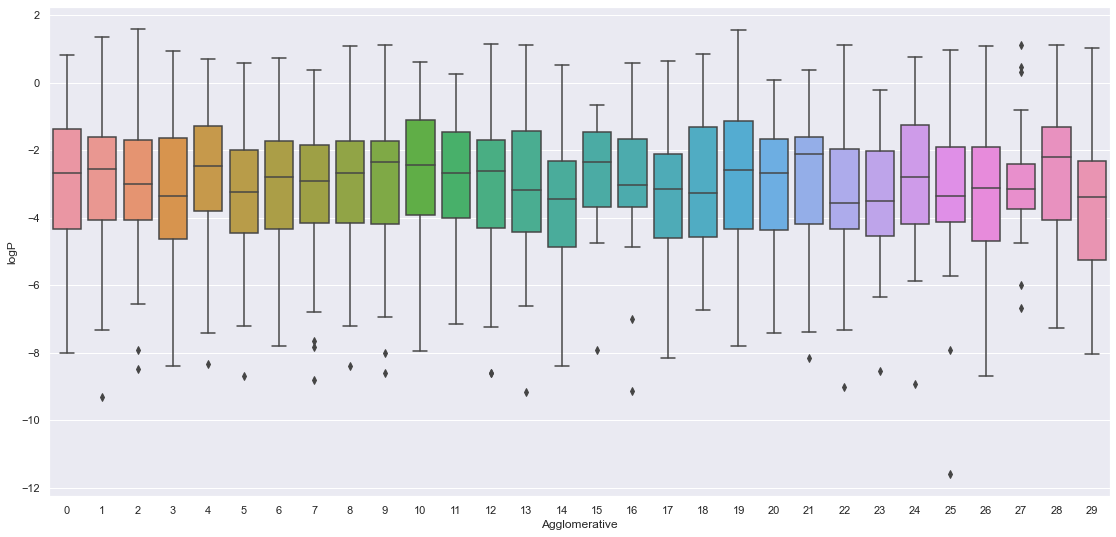

In [100]:
import seaborn as sns

sns.boxplot(x=maccs['Agglomerative'], y=maccs['logP'], data=maccs)
sns.set(rc={'figure.figsize':(19,9)})

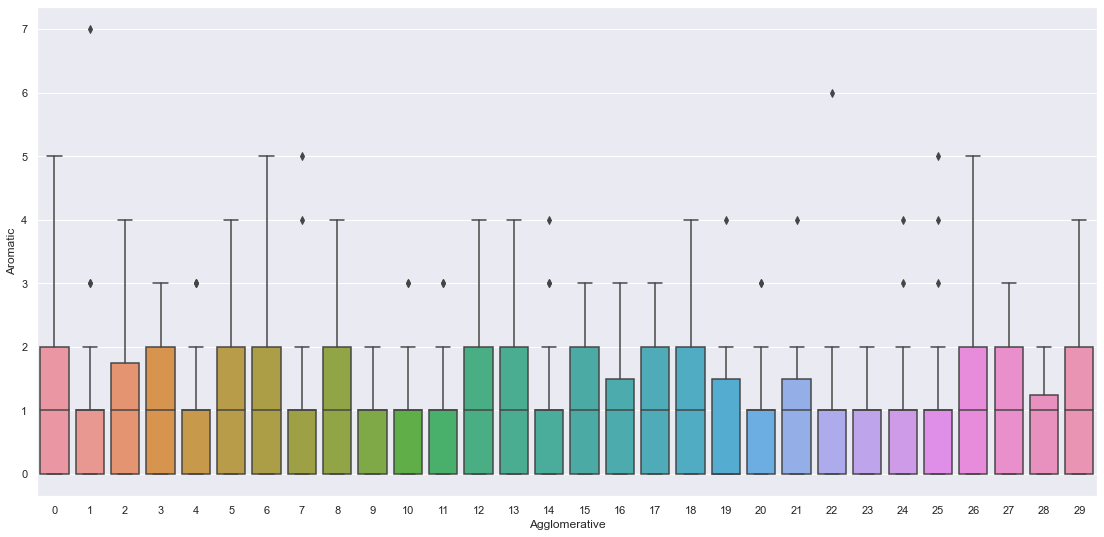

In [101]:
sns.boxplot(x=maccs['Agglomerative'], y=maccs['Aromatic'], data=maccs)
sns.set(rc={'figure.figsize':(19,9)})

In [102]:
maccs_lowlogp_dm = maccs[['fp49','fp139','fp84','fp151']].copy()
maccs_lowlogp = maccs[['fp49','fp139','fp84','fp151', 'logP', 'Hydrophobe']].copy()

res = 1 - pdist(maccs_lowlogp_dm, 'jaccard')
squareform(res)
maccs_distance = pd.DataFrame(squareform(res), index=maccs_lowlogp_dm.index, columns= maccs_lowlogp_dm.index)

model = AgglomerativeClustering(affinity='precomputed', n_clusters=20, linkage='complete').fit(maccs_distance)

model.labels_

array([ 0,  0,  0, ..., 16, 13,  9])

In [103]:
maccs_lowlogp['Agglomerative'] = model.labels_
# maccs_lowlogp['logP'] = maccs[['logP']].values
# maccs_lowlogp['Hydrophobe'] = maccs[['Hydrophobe']].values
maccs_lowlogp[500:700]

,fp49,fp139,fp84,fp151,logP,Hydrophobe,Agglomerative
500,0,0,0,0,-6.34,3,0
501,0,0,0,0,-4.07,2,0
502,0,0,0,0,-2.82,2,0
503,0,1,0,0,-3.48,2,0
504,0,0,0,1,-2.56,1,0
...,...,...,...,...,...,...,...
695,0,1,0,0,-3.85,7,0
696,0,0,0,1,-4.16,0,0
697,0,0,0,0,-3.11,3,0
698,0,0,0,0,-2.24,2,0


In [104]:
from sklearn.neighbors import NearestNeighbors

neighb = NearestNeighbors(n_neighbors=2)
nbrs = neighb.fit(maccs_fps) 
distances, indices = nbrs.kneighbors(maccs_fps)

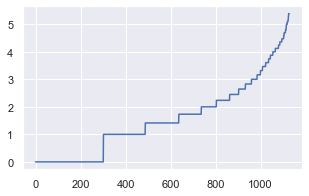

In [105]:
import matplotlib.pyplot as plt
import numpy as np

distances = np.sort(distances, axis = 0)
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (5,3) 
plt.plot(distances) 
plt.show() 

In [106]:
from sklearn.cluster import DBSCAN

maccs_fps = maccs.iloc[:,3:515].values
dbscan = DBSCAN(eps=0.3, min_samples=2, algorithm='auto', metric='jaccard').fit(maccs_fps)
clus_set = set(dbscan.labels_)
unique = len(clus_set)
unique

labels = dbscan.labels_ 
labels[6:600]

array([ 1,  3, -1,  0,  4,  1,  1,  5,  1,  6,  1,  1,  7,  1,  1,  8,  9,
        5, 10,  1,  5,  5,  1,  1,  1,  9,  5, 11,  1,  1, 12, -1, -1,  1,
        1,  1,  5,  3,  1,  1,  5,  5, -1, 12,  1,  5,  1,  5,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  5, -1, -1,  5, 13, -1,  1, 14, 15,  3,  5,
        1,  1, 16,  1,  1, -1, 17, 12, -1,  1,  1,  1, 18, 15,  3,  5, 15,
        5,  1,  1,  1,  1,  1,  1, -1,  1,  3, 12,  0, 19,  1, 20, 15,  5,
        1,  5,  1, 15,  1,  1, 12,  5, 12, -1,  1,  1,  1,  1,  1, 15,  1,
        1,  5, 18, 12,  1, 12,  3,  5,  1,  1,  1,  1,  5,  1,  1,  1, 12,
       11, 12,  1,  5, -1,  5,  1,  5,  5,  1,  1,  1,  1,  1,  1, -1, 15,
        1, -1, 15,  1, 21,  5,  1,  1, 16, 15, 10,  1, -1,  3, -1, -1, 16,
       -1,  5,  1, -1,  1, 18,  5, 22, 15,  3, 12,  1,  3,  5,  1, 23,  5,
        1,  1,  5,  1,  1,  1,  1, 24, -1, -1, -1, 25, 26,  5,  1,  1,  1,
        1,  1,  1, 27,  1,  1, 12, -1, 15,  0,  1, 15,  1,  5,  5,  5, -1,
        1,  1, 15, 28,  5

In [107]:
from sklearn.manifold import TSNE

maccs_m = TSNE(learning_rate=50, perplexity=8)
maccs_tsne_fts = maccs_m.fit_transform(maccs_fps)
maccs_tsne_fts

array([[ 50.562763 ,   9.280481 ],
       [  1.567083 , -67.08108  ],
       [ 40.62653  , -35.221706 ],
       ...,
       [  6.033735 ,  23.670176 ],
       [ 14.377771 ,   2.4280663],
       [-13.079997 ,  -7.548537 ]], dtype=float32)

In [108]:
maccs_tsne_fts_df = pd.DataFrame(maccs_tsne_fts, columns=['x', 'y'])
maccs_tsne_fts_df['logP'] = maccs_logps
maccs_tsne_fts_df

,x,y,logP
0,50.562763,9.280481,-0.770
1,1.567083,-67.081078,-3.300
2,40.626530,-35.221706,-2.060
3,60.588337,-10.635441,-7.870
4,3.677887,1.881912,-1.330
...,...,...,...
1123,14.756286,-11.355084,-1.710
1124,-5.334949,-34.178322,0.106
1125,6.033735,23.670176,-3.091
1126,14.377771,2.428066,-3.180


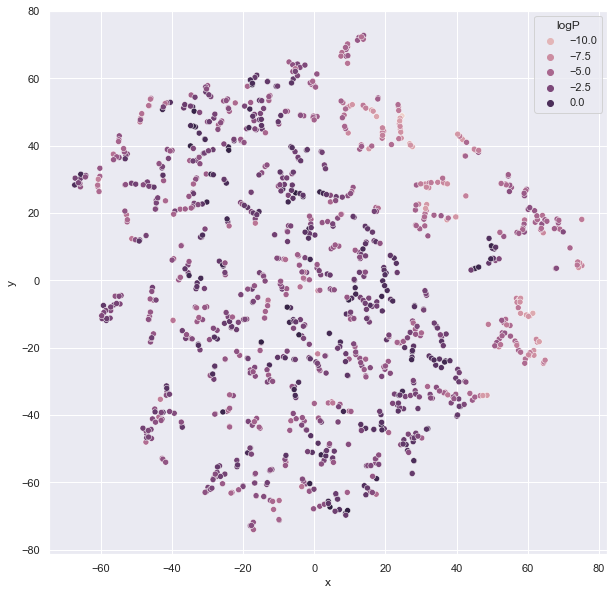

In [111]:
import seaborn as sns
from matplotlib import colors

sns.scatterplot(x='x', y='y', hue='logP', data=maccs_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [112]:
maccs_tsne_fts_df['Donor'] = maccs['Donor'].values
maccs_tsne_fts_df['Acceptor'] = maccs['Acceptor'].values
maccs_tsne_fts_df['Aromatic'] = maccs['Aromatic'].values
maccs_tsne_fts_df['Hydrophobe'] = maccs['Hydrophobe'].values
maccs_tsne_fts_df['LumpedHydrophobe'] = maccs['LumpedHydrophobe'].values
maccs_tsne_fts_df

,x,y,logP,Donor,Acceptor,Aromatic,Hydrophobe,LumpedHydrophobe
0,50.562763,9.280481,-0.770,7,11,1,1,1
1,1.567083,-67.081078,-3.300,1,1,2,1,1
2,40.626530,-35.221706,-2.060,0,1,0,6,0
3,60.588337,-10.635441,-7.870,0,0,5,8,5
4,3.677887,1.881912,-1.330,0,0,1,0,1
...,...,...,...,...,...,...,...,...
1123,14.756286,-11.355084,-1.710,0,0,0,1,0
1124,-5.334949,-34.178322,0.106,2,3,0,0,0
1125,6.033735,23.670176,-3.091,0,2,0,3,0
1126,14.377771,2.428066,-3.180,0,0,0,2,1


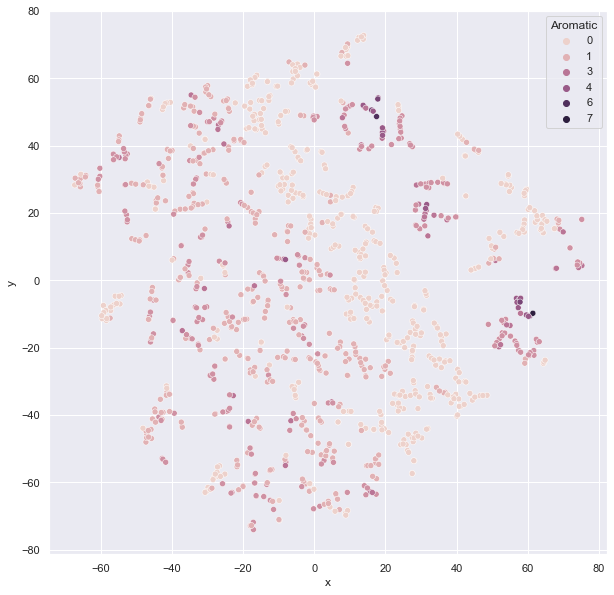

In [113]:
sns.scatterplot(x='x', y='y', hue='Aromatic', data=maccs_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

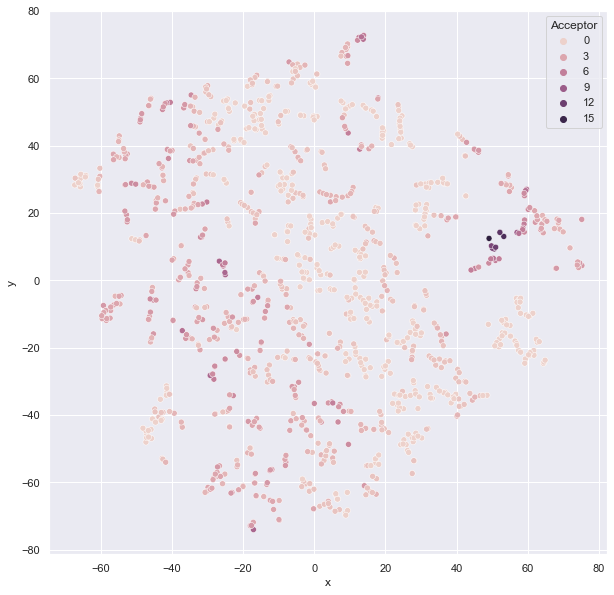

In [114]:
sns.scatterplot(x='x', y='y', hue='Acceptor', data=maccs_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

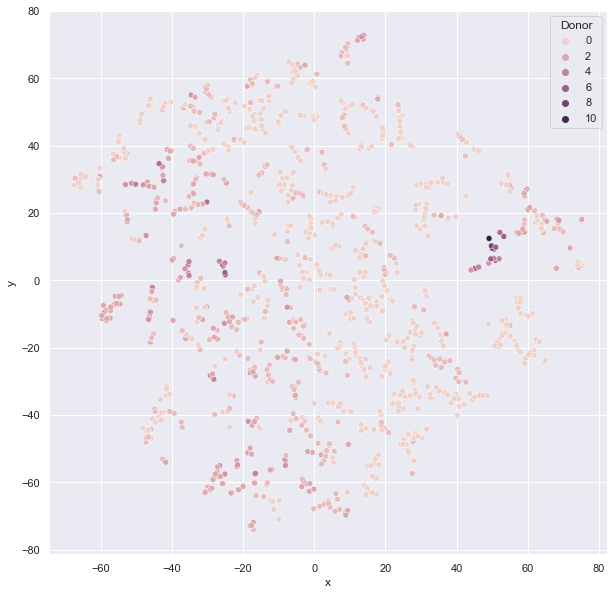

In [115]:
sns.scatterplot(x='x', y='y', hue='Donor', data=maccs_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

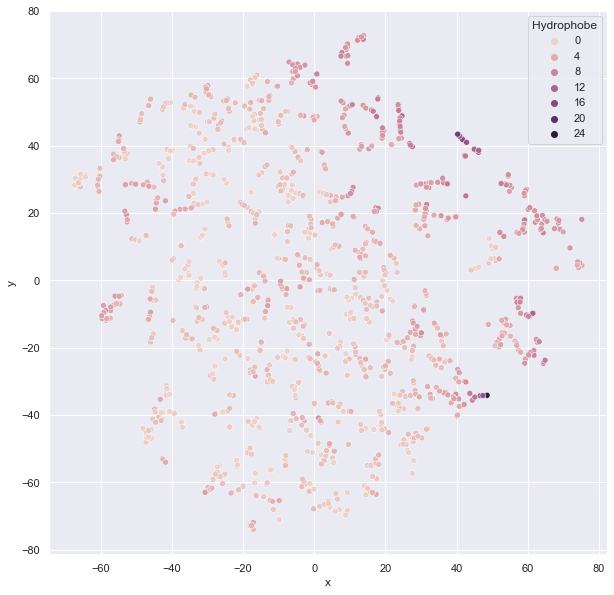

In [116]:
sns.scatterplot(x='x', y='y', hue='Hydrophobe', data=maccs_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [117]:
maccs_m = TSNE(learning_rate=50)
maccs_lowlogp = maccs[['fp49','fp139','fp84','fp151']]
maccs_tsne_fts_low = maccs_m.fit_transform(maccs_lowlogp)
maccs_tsne_fts_low

array([[ -8.617854  , -18.746176  ],
       [-14.263578  ,   8.512823  ],
       [  9.169236  ,   0.78068084],
       ...,
       [ 10.370896  ,   1.4780127 ],
       [  8.982683  ,   1.5640016 ],
       [  8.977099  ,   1.4990665 ]], dtype=float32)

In [118]:
maccs_tsne_fts_low_df = pd.DataFrame(maccs_tsne_fts_low, columns=['x', 'y'])
maccs_tsne_fts_low_df['logP'] = maccs_logps
# maccs_tsne_fts_low_df['Donor'] = maccs2['Donor'].values
# maccs_tsne_fts_low_df['Acceptor'] = maccs2['Acceptor'].values
# maccs_tsne_fts_low_df['Aromatic'] = maccs2['Aromatic'].values
# maccs_tsne_fts_low_df['Hydrophobe'] = maccs2['Hydrophobe'].values
# maccs_tsne_fts_low_df['LumpedHydrophobe'] = maccs2['LumpedHydrophobe'].values
maccs_tsne_fts_low_df

,x,y,logP
0,-8.617854,-18.746176,-0.770
1,-14.263578,8.512823,-3.300
2,9.169236,0.780681,-2.060
3,9.085876,0.927084,-7.870
4,8.982393,1.561455,-1.330
...,...,...,...
1123,10.370896,1.478013,-1.710
1124,-16.056612,7.345612,0.106
1125,10.370896,1.478013,-3.091
1126,8.982683,1.564002,-3.180


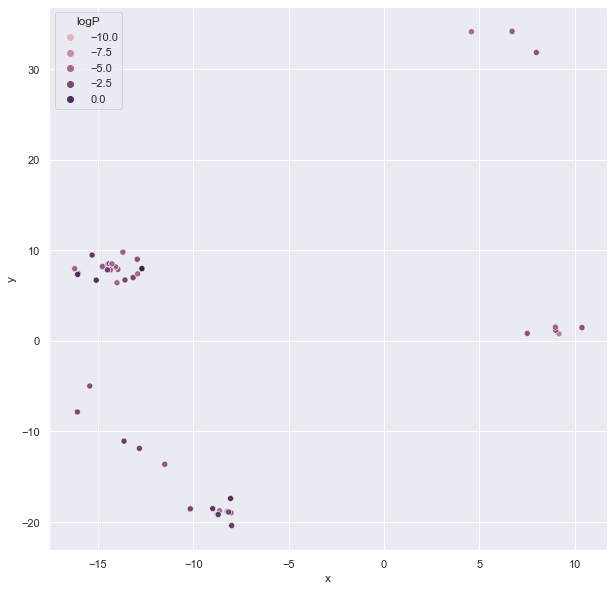

In [119]:
sns.scatterplot(x='x', y='y', hue='logP', data=maccs_tsne_fts_low_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [122]:
maccs_tsne_DB_df = pd.DataFrame(maccs_tsne_fts, columns=['x', 'y'])
maccs_tsne_DB_df['num'] = dbscan.labels_
maccs_tsne_DB_df

,x,y,num
0,50.562763,9.280481,0
1,1.567083,-67.081078,-1
2,40.626530,-35.221706,-1
3,60.588337,-10.635441,1
4,3.677887,1.881912,-1
...,...,...,...
1123,14.756286,-11.355084,1
1124,-5.334949,-34.178322,-1
1125,6.033735,23.670176,9
1126,14.377771,2.428066,1


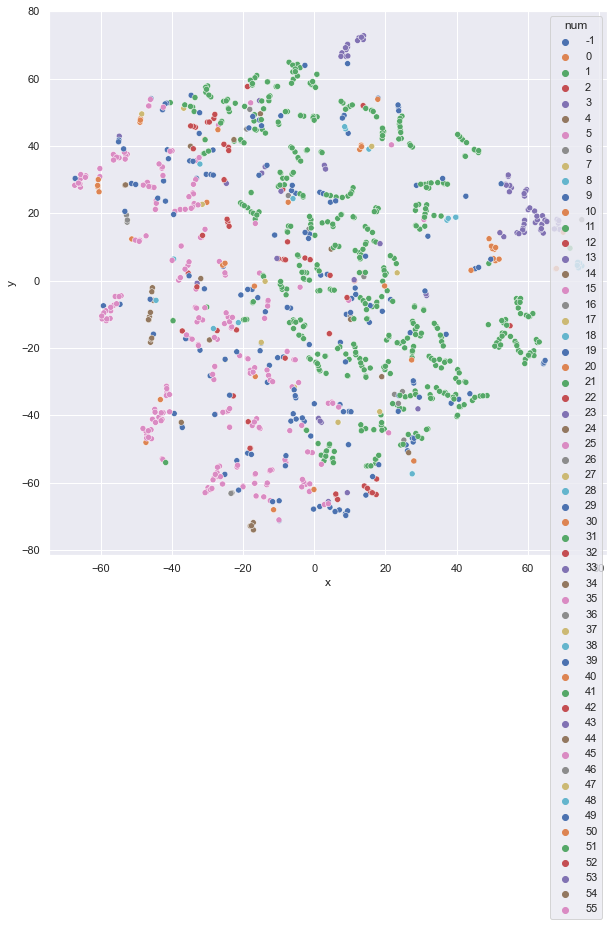

In [123]:
sns.scatterplot(x='x', y='y', hue='num', data=maccs_tsne_DB_df, palette="deep")#, legend=False)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [124]:
clustering = AgglomerativeClustering(n_clusters=9, linkage="ward").fit(maccs_tsne_fts)

maccs_tsne_AGG_df = pd.DataFrame(maccs_tsne_fts, columns=['x', 'y'])
maccs_tsne_AGG_df['num'] = clustering.labels_
maccs_tsne_AGG_df

,x,y,num
0,50.562763,9.280481,6
1,1.567083,-67.081078,4
2,40.626530,-35.221706,2
3,60.588337,-10.635441,2
4,3.677887,1.881912,1
...,...,...,...
1123,14.756286,-11.355084,1
1124,-5.334949,-34.178322,0
1125,6.033735,23.670176,1
1126,14.377771,2.428066,1


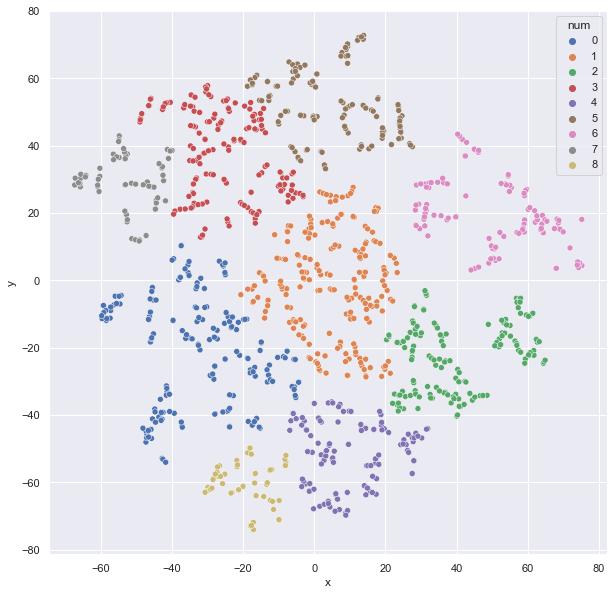

In [125]:
sns.scatterplot(x='x', y='y', hue='num', data=maccs_tsne_AGG_df, palette="deep")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()